#### 广州市二手房价格指数

(0.912664259875317, -1.5657838502409664)

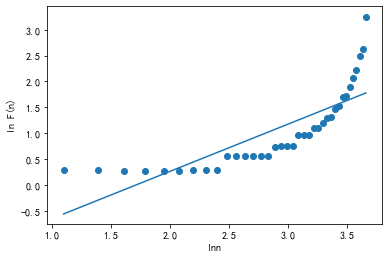

In [23]:
# coding: utf-8

from __future__ import division
from collections import Iterable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series

def calcHurst2(ts):

    if not isinstance(ts, Iterable):
        print('error')
        return

    n_min, n_max = 2, len(ts)//3
    RSlist = []
    for cut in range(n_min, n_max):
        children = len(ts)// cut
        children_list = [ts[i*children:(i+1)*children] for i in range(cut)]  
        L = []
        for a_children in children_list:
            Ma = np.mean(a_children)
            Xta = Series(map(lambda x: x-Ma, a_children)).cumsum()  
            Ra = max(Xta) - min(Xta)
            Sa = np.std(a_children)
            rs = Ra / Sa
            L.append(rs)
        RS = np.mean(L)
        RSlist.append(RS)
    H,c = np.polyfit(np.log(range(2+len(RSlist),2,-1)), np.log(RSlist), 1)  # 回归
    plt.scatter(np.log(range(2+len(RSlist),2,-1)), np.log(RSlist))  # 绘制散点图
    plt.plot(np.log(range(2+len(RSlist),2,-1)), c+H*np.log(range(2+len(RSlist),2,-1)))
    plt.ylabel('ln F(n)')
    plt.xlabel('lnn')
    return H,c

sec =  pd.read_excel(r'C:\Users\Administrator\Desktop\task\投资学\data\1234.xls') # 数据导入
a = sec.iloc[:,1]
sec = np.log(sec.iloc[:,1])
H,c = calcHurst2(sec)
H,c

#### 原始数据

Text(0.5, 1.0, '广州市二手房价格指数')

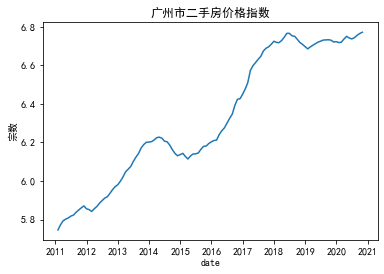

In [19]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']   # 中文字体
date = data.date
plt.plot(date,sec)
plt.ylabel('宗数')
plt.xlabel('date')
plt.title('广州市二手房价格指数')

Text(0, 0.5, '对数收益率')

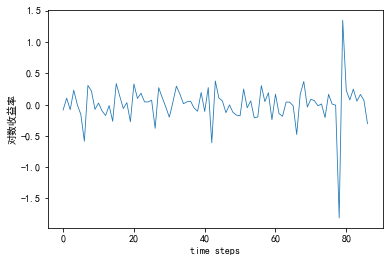

In [60]:
sec =  pd.read_excel(r'C:\Users\Administrator\Desktop\task\投资学\data\123.xls') # 数据导入
data = pd.DataFrame(sec.sec)
d = np.log(data/data.shift(1))
plt.plot(range(len(d[1:])),d[1:],lw=0.8)
plt.xlabel('time steps')
plt.ylabel('对数收益率')